In [1]:
import numpy as np
from sklearn.cross_validation import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import load_boston
from collections import OrderedDict

In [2]:
data = load_boston().data
target = load_boston().target

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

p_net = np.linspace(1, 10, 200)

In [11]:
fold_params = {'n': target.shape[0], 'n_folds': 5, 'shuffle': True, 'random_state': 42}
cross_validator = KFold(**fold_params)

score = 'mean_squared_error'

cross_val_scores = []

for p in p_net:
    clf_params = {'n_neighbors': 5, 'weights': 'distance', 'p': p}
    clf = KNeighborsRegressor(**clf_params)
    cvs = cross_val_score(estimator=clf, X=data_scaled, y=target, cv=cross_validator, scoring='mean_squared_error')
    cross_val_scores.append(cvs.mean())

print('Maximum MSE is {} using p = {}'.format(np.max(cross_val_scores), list(p_net)[np.argmax(cross_val_scores)]))

Maximum MSE is -16.050208508436157 using p = 1.0


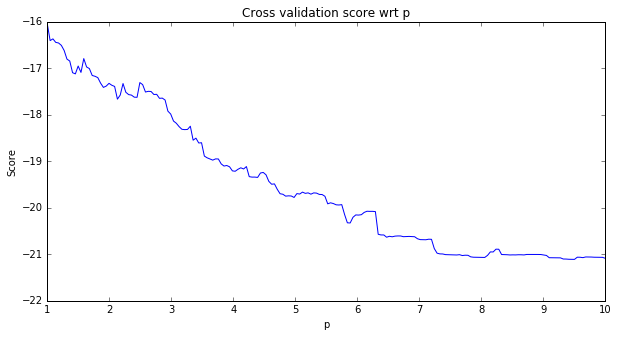

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,5))
plt.plot(list(p_net), cross_val_scores)
plt.title('Cross validation score wrt p')
plt.xlabel('p')
plt.ylabel('Score')
plt.show()